In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas
import numpy

# Input data

In [8]:
data = pandas.read_csv('hits_1000.csv', index_col=False)
#data = data[data.event.values < 100]

data.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-57.1605,-5.576950,-1502.5,7,2,1
1,2,-63.8989,0.462975,-1502.5,7,2,1
2,3,-77.9384,-3.249990,-1502.5,7,2,1
3,4,-78.7789,-12.644900,-1502.5,7,2,1
4,5,-85.1803,-3.970410,-1502.5,7,2,1


# Hough Transform

Consider a track pattern recognition method using the Hough Tramsform in polar system. In this system a circular track can be parametrized as follow:

$$
r = 2r_{0}Cos(\phi - \theta)
$$

where:
* $r$ and $\phi$ : are coordinates of a hit in the polar system.
* $r_{0}$ and $\theta$ : are coordinates of a center of a circular track in the polar system.

A linear track corresponds to the $r_{0} = \infty$.

Transformation of cartesian coordinates of a hit to polar coordinates defined as:

$$
\phi = arctan(\frac{y}{x})
$$
$$
r = \sqrt{x^{2} + y^{2}}
$$


The Hough Transform converts a hit in $(r, \phi)$ space to a curve in $(\frac{1}{r_{0}}, \theta)$ space of the track parameters as follow:

$$
\frac{1}{r_{0}} = \frac{2Cos(\phi - \theta)}{r}
$$

A linear track in this space represents as $(0, \theta)$ point.

This section demonstrates the track pattern recognition method using Hough Transfrom described above and histogramming technique. 

## One event

In [9]:
toy_event_id = 0
event = data[data.event.values == toy_event_id]

AttributeError: 'DataFrame' object has no attribute 'event'

In [10]:
event.columns

NameError: name 'event' is not defined

In [11]:
%%time

from hough import Hough

h = Hough(n_theta_bins=500, n_radius_bins=500, min_radius=20., min_hits=6)
h.fit(event[['x', 'y']].values, event.particle.values)
labels = h.predict(event[['x', 'y']].values)

# Optional attributes
matrix_hough = h.matrix_hough_
track_inds = h.track_inds_
track_params = h.track_params_

ModuleNotFoundError: No module named 'hough'

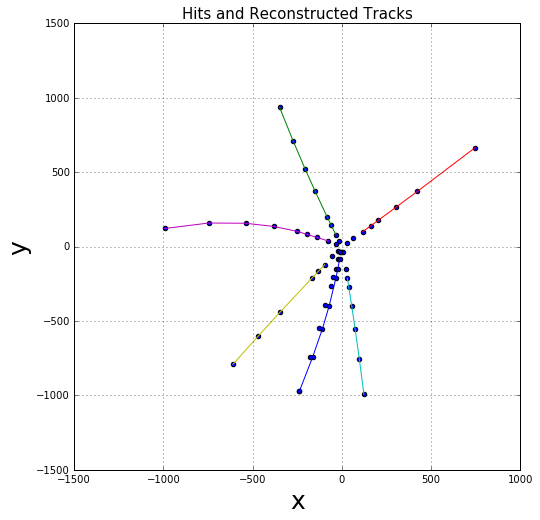

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(event.x.values, event.y.values)

for lab in numpy.unique(labels[labels != -1]):
    
    xs = event.x.values[labels == lab]
    ys = event.y.values[labels == lab]
    
    sort_inds = xs.argsort()
    
    plt.plot(xs[sort_inds], ys[sort_inds])

plt.title("Hits and Reconstructed Tracks", size=15)
plt.xlabel("x", size=25)
plt.ylabel("y", size=25)
plt.grid(b=1)
plt.show()

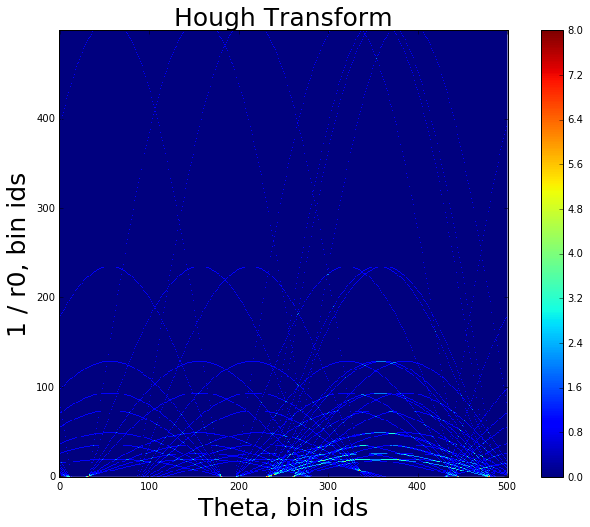

In [7]:
plt.figure(figsize=(12,8))
plt.imshow(matrix_hough.T, interpolation='none', origin='lower')
plt.title("Hough Transform", size=25)
plt.xlabel("Theta, bin ids", size=25)
plt.ylabel("1 / r0, bin ids", size=25)
plt.colorbar()
plt.show()

In [8]:
print "List of tracks. A track is a list of hit indexes. One hit can belong to several recognized tracks."
track_inds

List of tracks. A track is a list of hit indexes. One hit can belong to several recognized tracks.


array([array([13, 19, 22, 28, 35, 48, 52]),
       array([ 2,  5, 16, 36, 40, 49]),
       array([23, 29, 30, 32, 43, 53, 54]),
       array([17, 18, 23, 30, 33, 39, 45, 50]),
       array([17, 18, 23, 29, 30, 33, 39, 50]),
       array([ 0,  9, 14, 34, 38, 42]), array([ 1, 11, 12, 20, 24, 27]),
       array([ 7,  8, 10, 37, 46, 57]), array([17, 23, 29, 30, 32, 54]),
       array([17, 29, 32, 43, 53, 54])], dtype=object)

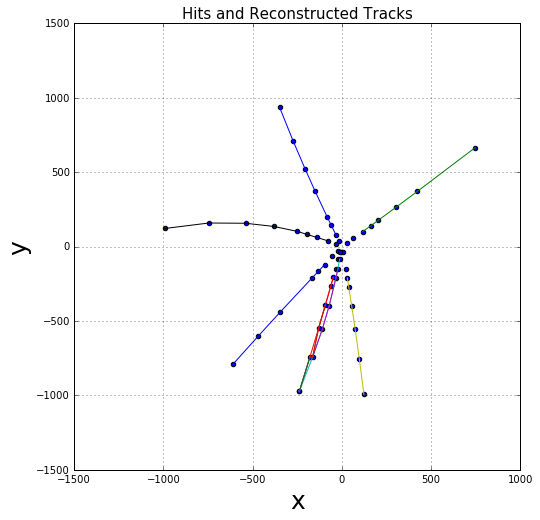

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(event.x.values, event.y.values)

for track in track_inds:
    
    xs = event.x.values[track]
    ys = event.y.values[track]
    
    sort_inds = xs.argsort()
    
    plt.plot(xs[sort_inds], ys[sort_inds])

plt.title("Hits and Reconstructed Tracks", size=15)
plt.xlabel("x", size=25)
plt.ylabel("y", size=25)
plt.grid(b=1)
plt.show()

In [10]:
track_params

array([[  4.02929719e-01,   1.00200401e-04],
       [  2.27907122e+00,   1.00200401e-04],
       [  2.92124046e+00,   1.00200401e-04],
       [  2.99678979e+00,   2.00400802e-04],
       [  3.00938134e+00,   3.00601202e-04],
       [  3.28639552e+00,   1.00200401e-04],
       [  4.21817050e+00,   8.01603206e-04],
       [  5.60324141e+00,   1.00200401e-04],
       [  6.03135423e+00,   1.00200401e-04],
       [  6.04394579e+00,   1.00200401e-04]])

## Several events

**TrackRecognizer** is used to recognize tracks in several events using a track pattern recognition method. The method should has the following structure:

In [11]:
class Method(object):
    
    def __init__(self, params):
        
        # You code
        
        pass
    
    def fit(X, y):
        """
        Parameters
        ----------
        X : ndarray-like:
            Coordinates of hits (x, y).
        y : array-like
            True hit labels.
        """
        
        # Your code
        
        pass
    
    def predict(self, X):
        """
        Parameters
        ----------
        X : ndarray-like:
            Coordinates of hits (x, y).
            
        Returns
        -------
        y : array-like
            True hit labels.
        """
        
        # Your code
        
        return y

In [12]:
from recognizer import TrackRecognizer

method = Hough(n_theta_bins=5000, n_radius_bins=1000, min_radius=20., min_hits=4)

tr = TrackRecognizer(method=method)
results = tr.predict(data)

results.head()

,event,track,x,y
0,0,2,55.103343,-401.233874
1,0,3,-381.682239,135.438799
2,0,5,160.995866,139.460859
3,0,0,-35.433651,-150.895515
4,0,-1,-19.627350,-82.702885


## Quality metrics

Track recognition quality metrics described below are based on hit matching technique.

**Track Finding Efficiency** (or Track Efficiency) of a track is defined as:

$$
\epsilon = \frac{N_{reco\_true\_hits}}{N_{reco\_hits}}
$$

where:
* $N_{reco\_true\_hits}$ : is the number of recognized tru hits of the track.
* $N_{reco\_hits}$ : is the number of recognized hits of the track.

The track is considered to be reconstructed if its efficiency is higher than threshold, for example, 80%.

**Reconstruction Efficiency** of an event is defined as:

$$
\epsilon = \frac{N_{reco\_tracks}}{N_{tracks}}
$$

where:
* $N_{reco\_tracks}$ : is number of recognized tracks (without clones) of the event.
* $N_{tracks}$ : is total number of tracks in the event.

**Ghost Rate** is defined as:

$$
\epsilon = \frac{N_{ghost\_tracks}}{N_{tracks}}
$$

where:
* $N_{ghost\_tracks}$ : is number of ghost tracks which do not reconstruct any true particle.
* $N_{tracks}$ : is total number of tracks in the event.


A track recognition method can recognize track of a particle multiple times. Such redundant reconstructions are called clones.

**Clone Rate** is defined as:

$$
\epsilon = \frac{\sum_{m} N_{m\_track}^{clones}}{N_{tracks}}
$$

where:
* $N_{m\_track}^{clones}$ : is number of redundant reconstructions of the m-th track.
* $N_{tracks}$ : is total number of tracks in the event.

In [13]:
from metrics import RecognitionQuality

rq = RecognitionQuality(data, results, track_eff_threshold=0.8, min_hits_per_track=4)
report_event, report_tracks = rq.calculate()

In [14]:
report_event.head()

,Event,ReconstructionEfficiency,GhostRate,CloneRate,AvgTrackEfficiency
0,0,1.000000,0.000000,0,0.982143
1,1,0.750000,0.166667,0,0.931818
2,2,0.800000,0.000000,0,1.000000
3,3,0.777778,0.111111,0,0.968750
4,4,0.875000,0.125000,0,0.972222


In [15]:
report_event.mean(axis=0)

Event                       499.500000
ReconstructionEfficiency      0.920124
GhostRate                     0.036922
CloneRate                     0.000000
AvgTrackEfficiency            0.976903
dtype: float64

In [16]:
report_tracks.head()

,Event,Track,TrackEfficiency
0,0,0,0.875
1,0,1,1.000
2,0,2,1.000
3,0,3,1.000
4,0,4,1.000
